# Example of model usage

In [1]:
#%matplotlib
from envs.CapsubotEnv import CapsubotEnv
import numpy as np
import time
import matplotlib.pyplot as plt

def action_law(t):
    F = 1.25
    T = 0.1
    tau = 0.3
    # return F*F_e(t, T, tau)
    return F*F_step(t, T, tau)


def F_e(t, T, tau):
    """
    Defines electromagnteic force of coil
    """
    return (1. - 2./np.pi*np.arctan((np.modf(t/T)[0] - tau)*10.E5))/2.


def F_step(t, T, tau):
    part = t/T - t//T
    return 1. if part < tau else 0.

try:
    env.close()
except Exception:
    pass

env = CapsubotEnv()
n_periods = 50
max_period = 0.1
T_max = n_periods*max_period
steps = int(T_max/env.dt)
ts = np.linspace(0, T_max, steps)

In [ ]:
states = []
actions = []
obs = env.reset()
for t in ts:
    states.append(env.state)
    action = action_law(t)  # Should move with average velocity
    actions.append(action)
    #obs, rewards, done, info = env.step(action)
    obs, rewards, done, info = env.step(action, integrator="euler")
    if (t % 0.005 <= env.dt):
        env.render()

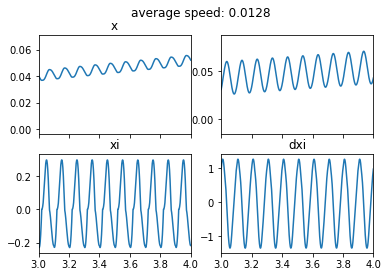

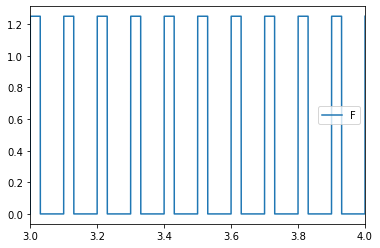

In [ ]:
states = np.array(states)

fig, axs = plt.subplots(2, 2, sharex=True)  # , sharex=True, sharey=True)
fig.suptitle("average speed: {:.3}".format( states[-1, 0] / ts[-1]))
axs[0, 0].plot(ts, states[:, 0], label="x")
axs[0, 0].set_title("x")
axs[1, 0].plot(ts, states[:, 1], label="dx")
axs[1, 0].set_title("dx")
axs[0, 1].plot(ts, states[:, 2] + states[:, 0], label="xi")
axs[1, 0].set_title("xi")
axs[1, 1].plot(ts, states[:, 3], label="dxi")
axs[1, 1].set_title("dxi")
t_shift = 3
axs[0, 0].set_xlim(t_shift, t_shift + 1)


plt.figure()
plt.plot(ts, actions, label="F")
plt.xlim(t_shift, t_shift + 1)
plt.legend()
plt.show()

